In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [ ]:
# Load data
((x_train, y_train), (_, _)) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255.
x_train = x_train.astype(np.float32)

x_train = np.reshape(x_train, (x_train.shape[0], 784))

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
mean = x_train.mean(axis = 1)

x_train = x_train - mean[:,None]

In [ ]:
s, u, v = tf.linalg.svd(x_train)

In [ ]:
s = tf.linalg.diag(s)

In [ ]:
print("Diagonal matrix shape: {} \nLeft Singular Matrix shape: {} \nRight Singular matrix shape: {}".
     format(s.shape,u.shape,v.shape))

Diagonal matrix shape: (784, 784) 
Left Singular Matrix shape: (60000, 784) 
Right Singular matrix shape: (784, 784)


In [ ]:
k = 3
pca = tf.matmul(u[:,0:k], s[0:k,0:k])

In [ ]:
print('original data shape',x_train.shape)
print('reduced data shape', pca.shape) 

original data shape (60000, 784)
reduced data shape (60000, 3)


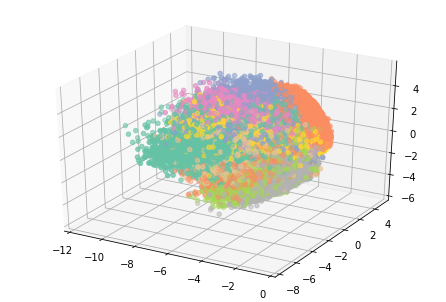

In [ ]:
Set = sns.color_palette("Set2", 10)
color_mapping = {key:value for (key,value) in enumerate(Set)}
colors = list(map(lambda x: color_mapping[x], y_train))
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca[:, 0], pca[:, 1],pca[:, 2], c=colors)